# Question 3: Create a modified preferential attachment model that penalizes the age of a node

## (a)

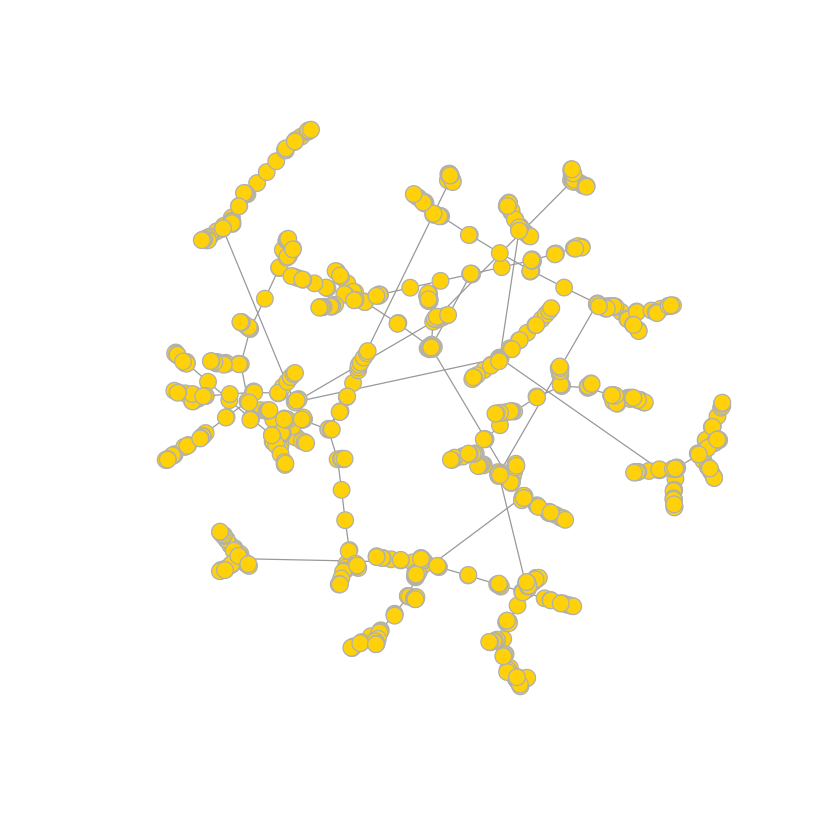

     degree      distr
1  0.000000       -Inf
2  1.000000 -0.9241251
3  1.584963 -2.0115880
4  2.000000 -3.2653446
5  2.321928 -4.1584294
6  2.584963 -5.3808218
7  2.807355 -6.1584294
8  3.000000 -7.1584294
9  3.169925 -7.9657843
10 3.321928 -6.5063527
11 3.459432 -7.9657843
12 3.584963       -Inf
13 3.700440       -Inf
14 3.807355       -Inf
15 3.906891       -Inf
16 4.000000 -9.9657843


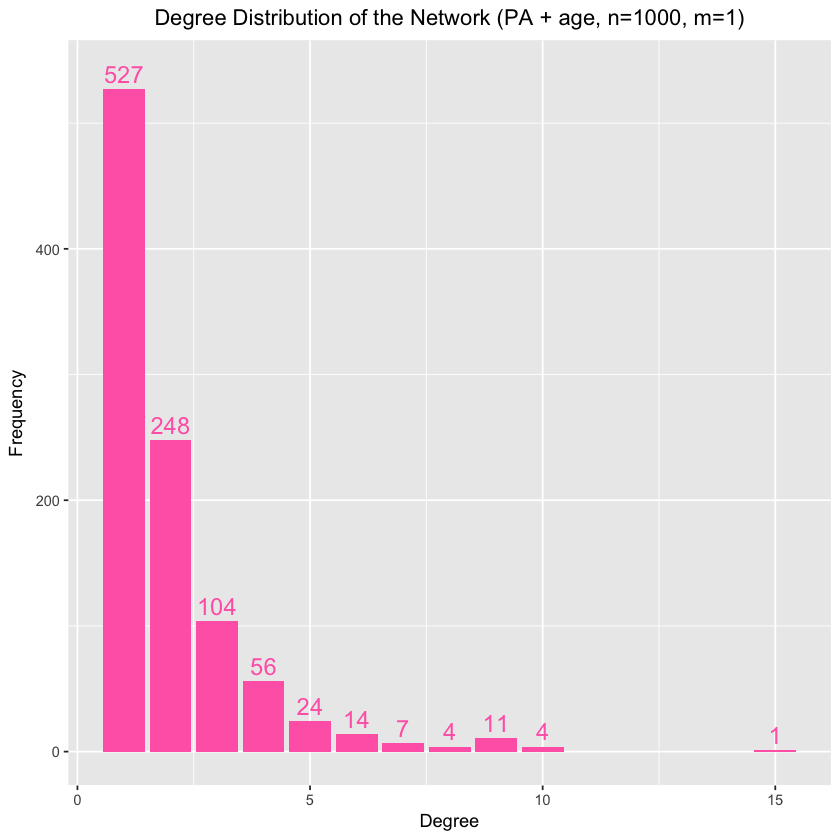

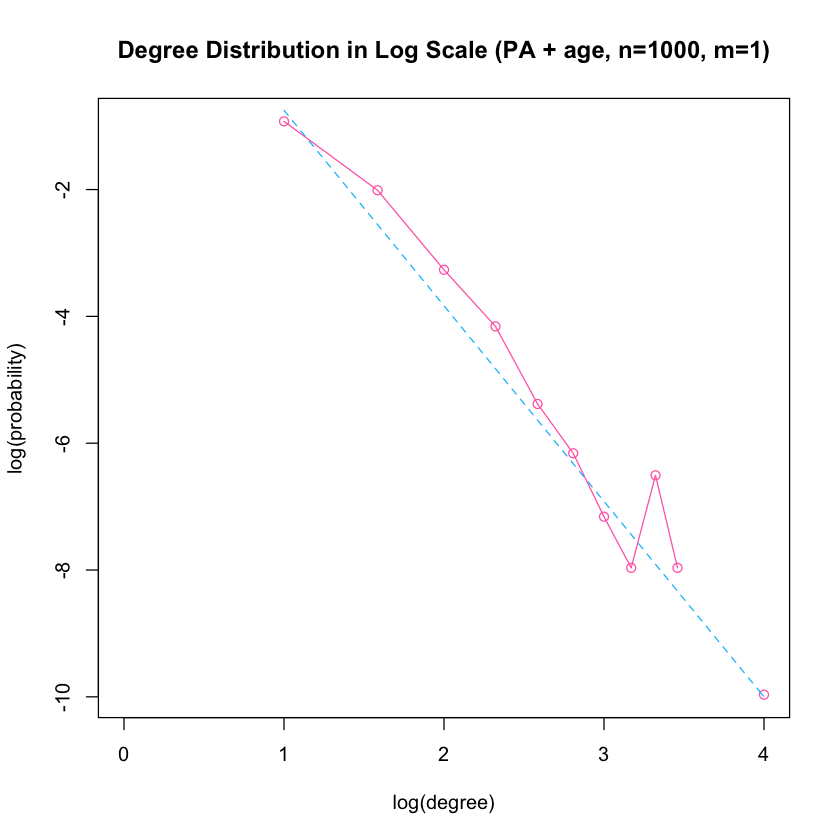

In [7]:
library(igraph)
library(ggplot2)

# create a new network
g <- sample_pa_age(1000, pa.exp=1, aging.exp=-1, m=1, directed = F,
  zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
plot(g, edge.arrow.size=.5, vertex.color="gold", vertex.size=6, vertex.frame.color="gray", vertex.label="") 

# plot degree distribution
degree_distribution_orig = function(graph) {
    # count the frequency of each degree
    freq <- sort(degree(graph))
    df <- data.frame(degree=c(NA), freq=c(NA))
    df <- df[-1, ]
    curDegree <- freq[1]
    count <- 1
    for (i in 2:length(freq)) {
        if (freq[i] != curDegree) {
            df[nrow(df)+1, ] <- c(curDegree, count)
            curDegree <- freq[i]
            count <- 1
        } else {
            count <- count + 1
        }
    }
    df[nrow(df)+1, ] <- c(curDegree, count)
    
    # plot original degree distribution histogram
    ggplot(df, aes(x=degree, y=freq))+ 
    geom_bar(stat = "identity", fill="hotpink")+
    geom_text(aes(x=degree,y=freq+12,label=freq),color="hotpink",size=5,show.legend = T)+
    labs(title="Degree Distribution of the Network (PA + age, n=1000, m=1)", x="Degree", y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5))
}

degree_distribution_log = function(graph) {
    # plot degree distribution in log-log scale 
    degree <- log2(c(1:length(degree.distribution(graph))))
    distr <- log2(degree.distribution(graph))
    df <- data.frame(degree, distr)
    print(df)
    plot(degree, distr, type="o", col="hotpink", main="Degree Distribution in Log Scale (PA + age, n=1000, m=1)",xlab="log(degree)",ylab="log(probability)")
    lines(seq(1,4,0.03), seq(-0.75,-10,-0.0925),col="deepskyblue",lty=2)
}

degree_distribution_orig(g)
degree_distribution_log(g)


## (b)

[1] 0.9354455

IGRAPH clustering fast greedy, groups: 30, mod: 0.94
+ groups:
  $`1`
   [1]  36  79  89 103 110 130 140 150 205 268 280 310 337 382 410 448 505 509
  [19] 554 606 619 624 708 719 746 776 792 802 806 817 821 828 838 840 843 846
  [37] 855 856 871 883 917 934 937 984 987
  
  $`2`
   [1] 523 525 529 605 629 650 670 674 678 694 695 697 706 709 715 728 754 758
  [19] 765 768 777 779 789 793 798 826 832 834 845 849 853 863 879 881 886 887
  [37] 888 891 899 908 914 918 946 956 958 959
  
  + ... omitted several groups/vertices


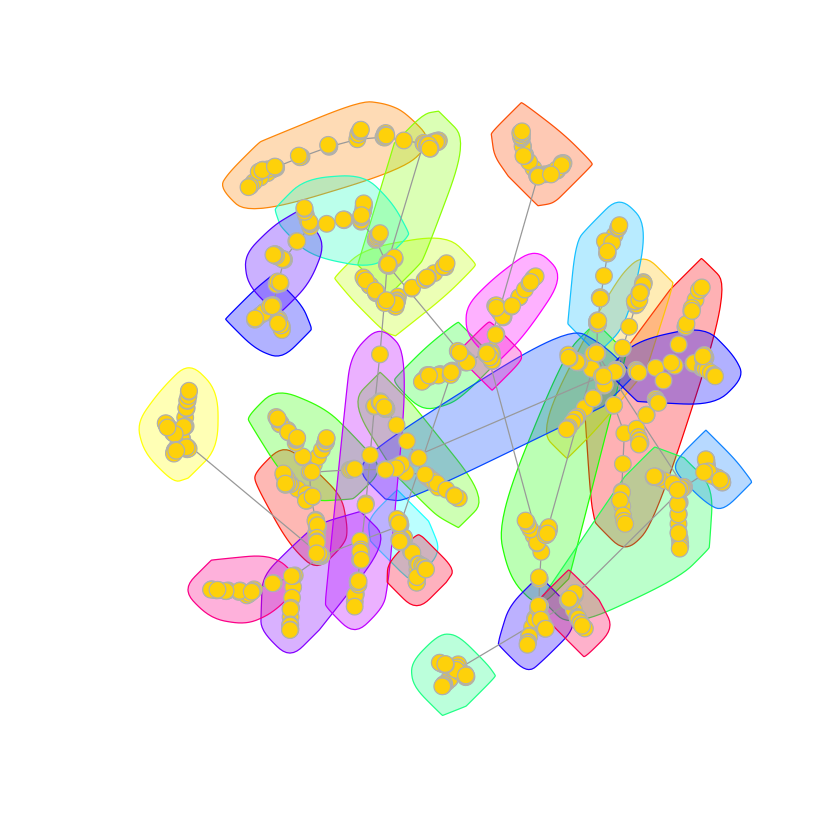

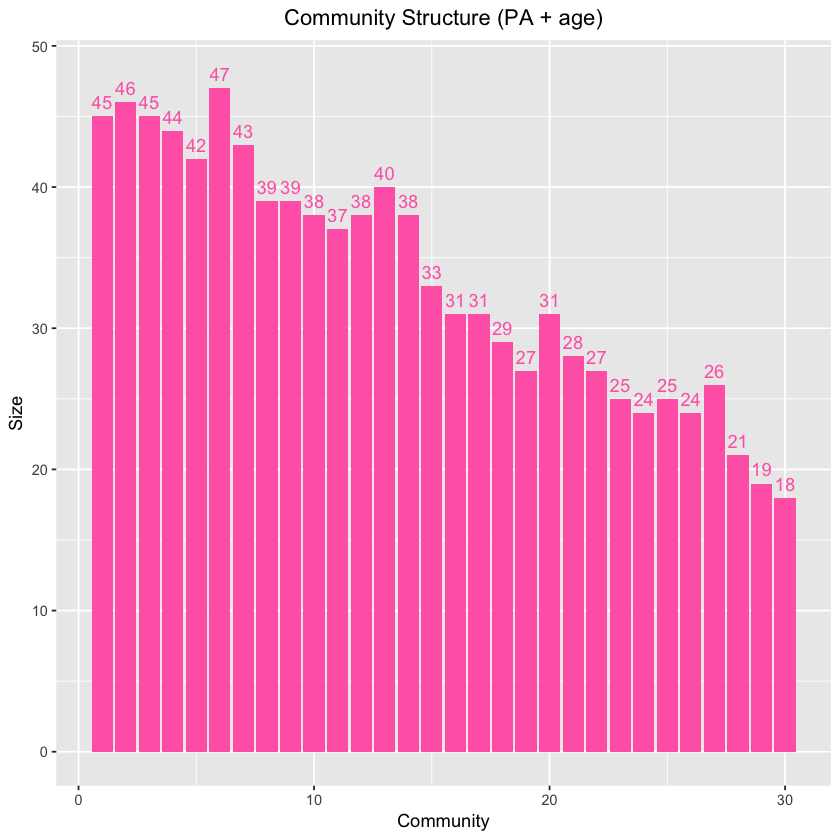

In [9]:
# community detection and measure modularity
communities <- cluster_fast_greedy(g)
modularity(communities)
print(communities)
plot(g, mark.groups=groups(communities), edge.arrow.size=.5, 
     vertex.color="gold", vertex.size=6, vertex.frame.color="gray", vertex.label="")

# plot community structure
index <- c(1:length(communities))
size <- as.vector(sizes(communities))
comm_df <- data.frame(index, size)

ggplot(comm_df, aes(x=index, y=size))+ 
geom_bar(stat = "identity", fill="hotpink")+
geom_text(aes(x=index,y=size+1,label=size),color="hotpink",show.legend = T)+
labs(title="Community Structure (PA + age)", x="Community", y="Size")+
theme(plot.title = element_text(hjust = 0.5))